/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:02<00:00, 194MB/s]  


Epoch 1/10


100%|██████████| 171/171 [02:40<00:00,  1.07it/s]


Train Loss: 0.9271, Train Accuracy: 0.6837
Val Loss: 0.5233, Val Accuracy: 0.8680
Epoch 2/10


100%|██████████| 171/171 [01:55<00:00,  1.47it/s]


Train Loss: 0.3451, Train Accuracy: 0.8987
Val Loss: 0.3284, Val Accuracy: 0.9090
Epoch 3/10


100%|██████████| 171/171 [01:52<00:00,  1.52it/s]


Train Loss: 0.2078, Train Accuracy: 0.9413
Val Loss: 0.2298, Val Accuracy: 0.9251
Epoch 4/10


100%|██████████| 171/171 [01:52<00:00,  1.52it/s]


Train Loss: 0.1839, Train Accuracy: 0.9508
Val Loss: 0.1239, Val Accuracy: 0.9648
Epoch 5/10


100%|██████████| 171/171 [01:53<00:00,  1.50it/s]


Train Loss: 0.1346, Train Accuracy: 0.9634
Val Loss: 0.0865, Val Accuracy: 0.9725
Epoch 6/10


100%|██████████| 171/171 [01:52<00:00,  1.52it/s]


Train Loss: 0.1169, Train Accuracy: 0.9717
Val Loss: 0.1747, Val Accuracy: 0.9599
Epoch 7/10


100%|██████████| 171/171 [01:51<00:00,  1.54it/s]


Train Loss: 0.1865, Train Accuracy: 0.9518
Val Loss: 0.0792, Val Accuracy: 0.9780
Epoch 8/10


100%|██████████| 171/171 [01:52<00:00,  1.52it/s]


Train Loss: 0.1026, Train Accuracy: 0.9728
Val Loss: 0.1178, Val Accuracy: 0.9723
Epoch 9/10


100%|██████████| 171/171 [01:52<00:00,  1.52it/s]


Train Loss: 0.0785, Train Accuracy: 0.9803
Val Loss: 0.1086, Val Accuracy: 0.9696
Epoch 10/10


100%|██████████| 171/171 [01:52<00:00,  1.51it/s]


Train Loss: 0.0886, Train Accuracy: 0.9779
Val Loss: 0.0484, Val Accuracy: 0.9883
Model saved successfully at vgg19_model_Aug.pth


100%|██████████| 86/86 [01:22<00:00,  1.05it/s]


Test Loss: 0.0693, Test Accuracy: 0.9846

Test Classification Report:
              precision    recall  f1-score   support

    30cotton       1.00      0.96      0.98       201
    40cotton       0.99      1.00      0.99       209
    50cotton       1.00      1.00      1.00       214
    53cotton       1.00      1.00      1.00       208
    58cotton       1.00      0.97      0.98       226
    60cotton       1.00      0.98      0.99       225
    63cotton       0.99      0.99      0.99       199
    65cotton       0.97      1.00      0.99       209
    66cotton       0.95      0.99      0.97       210
    80cotton       0.98      0.98      0.98       214
    95cotton       0.96      1.00      0.98       196
    98cotton       0.98      0.96      0.97       221
    99cotton       0.98      0.99      0.98       199

    accuracy                           0.98      2731
   macro avg       0.98      0.98      0.98      2731
weighted avg       0.98      0.98      0.98      2731



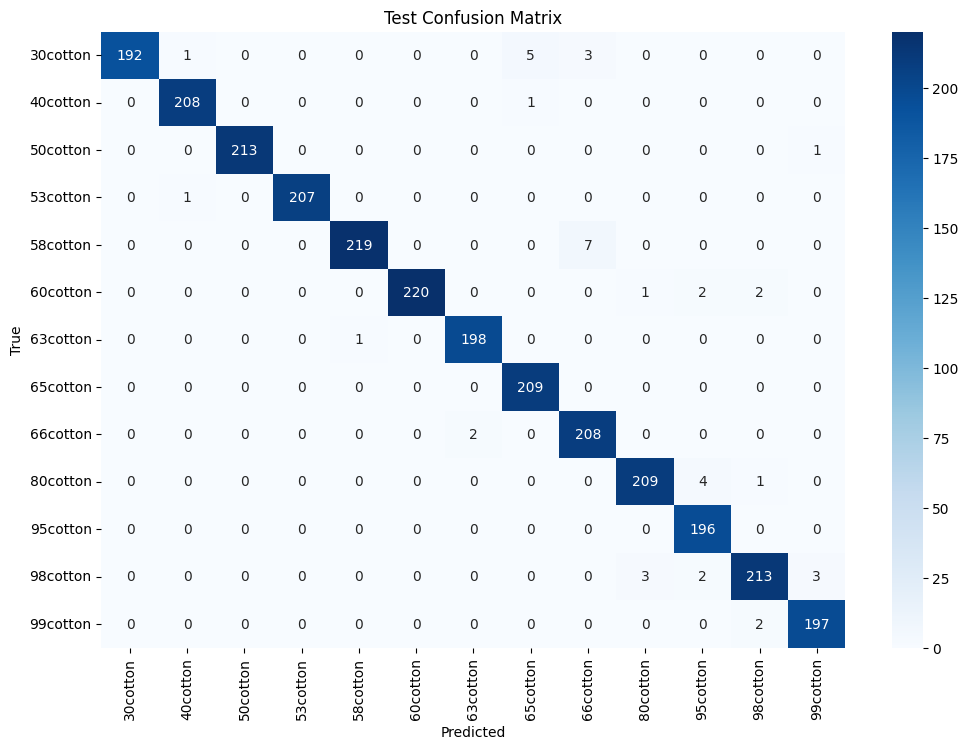

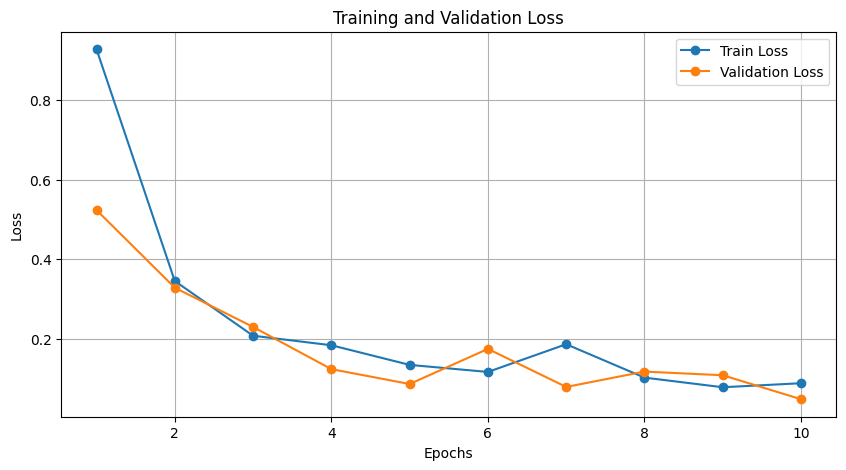

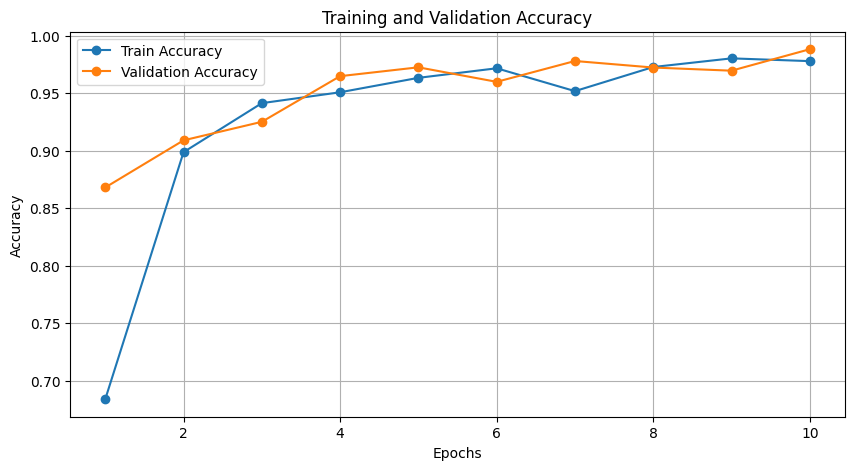


Final Test Metrics:
Test Accuracy: 0.9846
Test F1-Score (Weighted): 0.9846
Test Recall (Weighted): 0.9846


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset class
class CottonDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_names = sorted(os.listdir(root_dir))  # Class names from folder structure

        for label, class_name in enumerate(self.class_names):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, img_name))
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        try:
            image = Image.open(img_path).convert("RGB")  # Ensure RGB channels
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None  # Skip this image if an error occurs

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Dataset path
data_dir = "/kaggle/input/cotton/CottonFabricImageBD/Augmented"

# Initialize the dataset
full_dataset = CottonDataset(data_dir, transform=None)

# Calculate the number of training, validation, and test samples
total_samples = len(full_dataset)
train_size = int(0.7 * total_samples)
val_size = int(0.2 * total_samples)
test_size = total_samples - train_size - val_size

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Apply specific transforms to train, validation, and test datasets
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# Data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Load the pre-trained VGG19 model
model = models.vgg19(pretrained=True)

# Modify the classifier for the number of classes in the dataset
num_classes = len(full_dataset.class_names)
model.classifier[6] = nn.Linear(in_features=model.classifier[6].in_features, out_features=num_classes)

# Send model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training function
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in tqdm(loader):
        if images is None:  # Skip if image is None (corrupted)
            continue

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / len(loader), correct / total

# Validation function
def validate_epoch(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(loader):
            if images is None:  # Skip if image is None (corrupted)
                continue

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return total_loss / len(loader), correct / total, all_preds, all_labels

# Initialize lists to store training and validation metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc, _, _ = validate_epoch(model, val_loader, criterion, device)

    # Append metrics to lists
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# Save the trained model
model_save_path = "vgg19_model_Aug.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved successfully at {model_save_path}")

# Evaluate on test set
test_loss, test_acc, test_preds, test_labels = validate_epoch(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Classification report and confusion matrix for test set
print("\nTest Classification Report:")
print(classification_report(test_labels, test_preds, target_names=full_dataset.class_names))

cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=full_dataset.class_names, yticklabels=full_dataset.class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Final Test Metrics
accuracy = accuracy_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds, average="weighted")
recall = recall_score(test_labels, test_preds, average="weighted")

print(f"\nFinal Test Metrics:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-Score (Weighted): {f1:.4f}")
print(f"Test Recall (Weighted): {recall:.4f}")
